In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from osgeo import osr
from osgeo import gdal

In [2]:
file = r"/home/smitesh22/Data/DEM/N15E073_wgs84.tif"

In [3]:
im = Image.open(file)

In [4]:
im_data = np.asarray(im)

In [5]:
im_data

array([[  0.     ,   0.     ,   0.     , ..., 377.83917, 375.8396 ,
        382.84006],
       [  0.     ,   0.     ,   0.     , ..., 391.8381 , 389.83856,
        394.839  ],
       [  0.     ,   0.     ,   0.     , ..., 411.83704, 410.83746,
        410.83792],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)

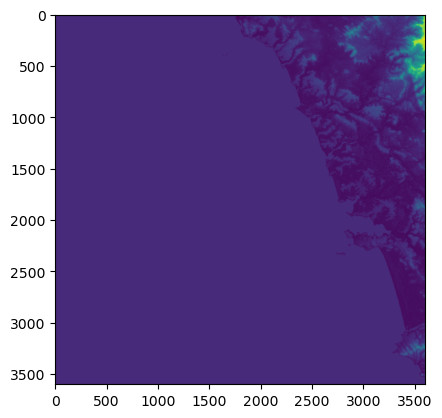

In [6]:
plt.imshow(im_data)

In [7]:
im_data.shape

(3601, 3601)

In [8]:
im = gdal.Open(file)

In [9]:
geotransform = im.GetGeoTransform()

In [10]:
projection = im.GetProjection()


In [18]:
# Extract corner coordinates
ulx, xres, xskew, uly, yskew, yres = geotransform
lrx = ulx + (im.RasterXSize * xres)
lry = uly + (im.RasterYSize * yres)

# Create coordinate transformation
source_projection = osr.SpatialReference()
source_projection.ImportFromWkt(projection)
target_projection = osr.SpatialReference()
target_projection.ImportFromEPSG(4326)  # Assuming you want WGS84 coordinates

transform = osr.CoordinateTransformation(source_projection, target_projection)

# Transform corner coordinates to target CRS
ul_lon, ul_lat, _ = transform.TransformPoint(ulx, uly)
lr_lon, lr_lat, _ = transform.TransformPoint(lrx, lry)

# Print the extracted coordinates
print("Upper Left: ", ul_lon, ul_lat)
print("Lower Right: ", lr_lon, lr_lat)
print("Upper Right: ", ul_lat, lr_lon)
print("Lower Left: ", lr_lat, ul_lon)

Upper Left:  72.99986111111112 16.000138888888888
Lower Right:  74.0001388888889 14.999861111111109
Upper Right:  16.000138888888888 74.0001388888889
Lower Left:  14.999861111111109 72.99986111111112


In [12]:
data = pd.read_csv("/home/smitesh22/Data/extent.csv")

In [13]:
import re
pattern = r"\/([^\/]+)\.tif$"

match = re.search(pattern, file)

filename = match.group(1)
print(filename)



N15E073_wgs84


In [19]:
new_data = {
    "filename": filename,
    "upper_lat": ul_lat,
    "upper_long": lr_lon,
    "lower_lat": lr_lat,
    "lower_long": ul_lon
}

In [20]:
new_row_df = pd.DataFrame([new_data])

# Concatenate the existing data with the new row DataFrame
data = pd.concat([data, new_row_df], ignore_index=True)

# Write the updated DataFrame back to CSV
data.to_csv("/home/smitesh22/Data/extent.csv", index=False)

In [21]:
data

,filename,upper_lat,upper_long,lower_lat,lower_long
0,N15E073_wgs84,16.000139,72.999861,14.999861,74.000139
1,N15E073_wgs84,16.000139,72.999861,14.999861,74.000139
2,N15E073_wgs84,16.000139,74.000139,14.999861,72.999861
